# Create 3D PET-MR brain phantoms using brainweb phantoms and patient T1-MR images

### 1- FDG PET and T1/T2 weighted MR brain phantoms using 20 brainweb phantoms

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from brainweb import PETbrainWebPhantom

In [3]:
# creat FDG activity (pet), attenuation map (mumap), t1 and t2 weighted MR image for mMR scanner (default), include 10 lesions with random radii,
# see 'PETbrainWebPhantom' for default values

phantom_number= 0 # [0-19]
phanPath = r'C:\brainweb-raw' # it downloads the phantom from web and saves it here

pet, mumap, t1, t2 = PETbrainWebPhantom(phanPath, phantom_number=phantom_number,voxel_size=None,image_size=None, num_lesions = 10, \
                       lesion_size_mm = [2,10], pet_lesion = True,t1_lesion = True, t2_lesion = False,hot_cold_ratio = 0.5, return_hirez = False)


(<matplotlib.image.AxesImage at 0x16c0f1b2860>, (-0.5, 135.5, 135.5, -0.5))

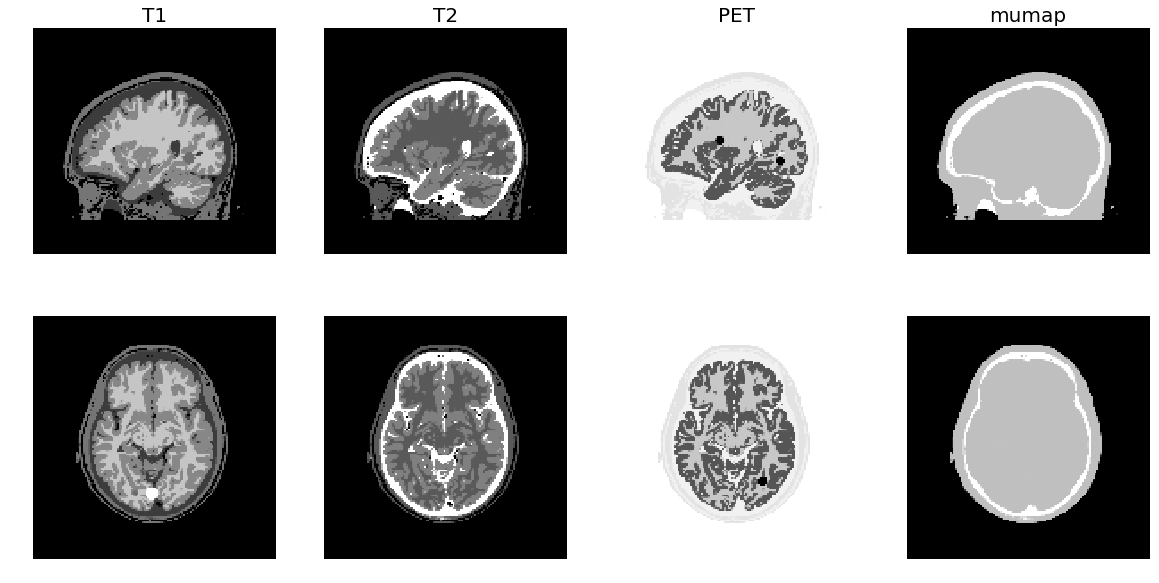

In [19]:
# display

def crop(x,f=0.6):
    i =  int(np.ceil(x.shape[0]*f/2.0)*2)//2    
    return x[i:x.shape[0]-i, i:x.shape[1]-i]

i = 80
fig, ax = plt.subplots(2,4,figsize=(20,10))
ax[0,0].imshow(np.rot90(crop(t1)[:,i,:],1),cmap='gist_gray',vmax=200),ax[0,0].set_title('T1',fontsize=20), ax[0,0].axis('off')
ax[0,1].imshow(np.rot90(crop(t2)[:,i,:],1),cmap='gist_gray',vmax=200),ax[0,1].set_title('T2',fontsize=20), ax[0,1].axis('off')
ax[0,2].imshow(np.rot90(crop(pet)[:,i,:],1),cmap='gist_gray_r'),ax[0,2].set_title('PET',fontsize=20), ax[0,2].axis('off')
ax[0,3].imshow(np.rot90(crop(mumap)[:,i,:],1),cmap='gist_gray'),ax[0,3].set_title('mumap',fontsize=20), ax[0,3].axis('off')
i = 50
ax[1,0].imshow(crop(t1)[:,:,i],cmap='gist_gray',vmax=200), ax[1,0].axis('off')
ax[1,1].imshow(crop(t2)[:,:,i],cmap='gist_gray',vmax=200), ax[1,1].axis('off')
ax[1,2].imshow(crop(pet)[:,:,i],cmap='gist_gray_r'), ax[1,2].axis('off')
ax[1,3].imshow(crop(mumap)[:,:,i],cmap='gist_gray'), ax[1,3].axis('off')



### 2- FDG PET and T1/T2 weighted MR brain phantoms using patient T1 MR images

In [ ]:
# MATLAB
# To generate phantoms from a patient's T1-weighted image, use SPM12 (MATLAB) to segment into grey matter, white matter, CSF, bone and backgroud air

# Follow, the demo in \spm_brain_segmentation\demo.m

"""
% download 
% 1) Tools for NIfTI and ANALYZE image
% https://mathworks.com/matlabcentral/fileexchange/8797?download=true

% 2) SPM12
% https://www.fil.ion.ucl.ac.uk/spm/software/download/

% 3) in python: install nibabel 

spm_path = 'c:\spm12\';
nifit_path = 'c:\NIfTI_20140122\';

% convert dicom to nifti
t1_dicom_path = 'C:\pet_brain_phantoms\data\MPRAGE_image\';
t1_nii_flname = spm_dicom2nifti(t1_dicom_path);

% creat spm job and run
job = spm_create_seg_job(spm_path, t1_nii_flname, pwd);
spm('defaults', 'FMRI');
spm_jobman('run', job, {});

"""

In [1]:
# Python
# pip install nibabel
from matplotlib import pyplot as plt
import numpy as np
from brainkcl import PETbrainKclPhantom


nii_path = r'C:\pet_brain_phantoms\data\MPRAGE_image\nii'
pet, mumap, t1, pet_h, mumap_h, t1_h = PETbrainKclPhantom(nii_path,pet_lesion = True, return_hirez = True) 

(<matplotlib.image.AxesImage at 0x1a78442e198>, (-0.5, 101.5, 101.5, -0.5))

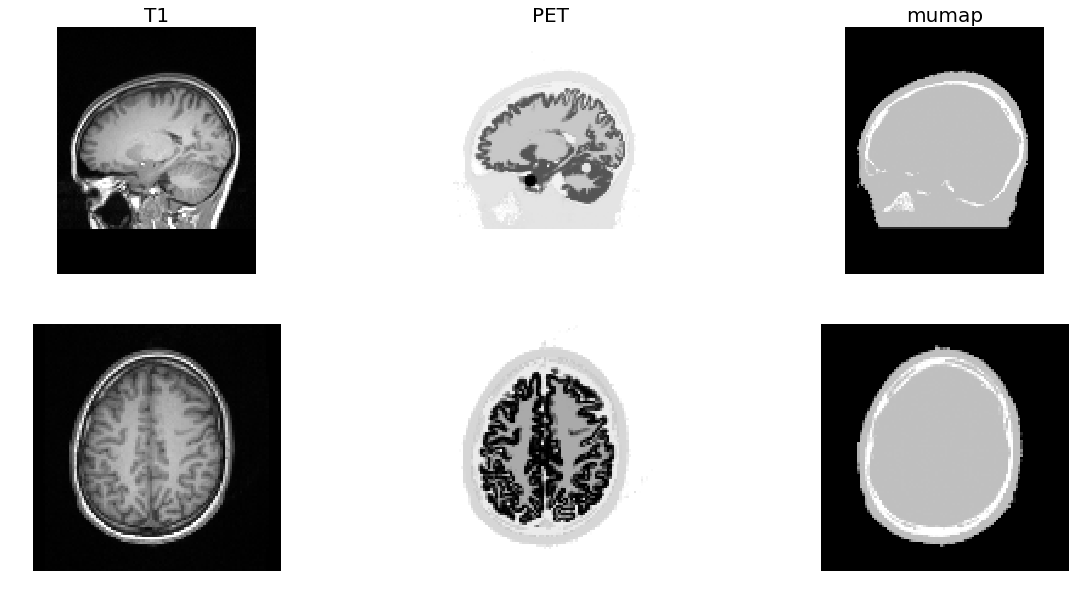

In [6]:
# display PET resolution images

def crop(x,f=0.7):
    i =  int(np.ceil(x.shape[0]*f/2.0)*2)//2    
    return x[i:x.shape[0]-i, i:x.shape[1]-i]

i = 40
fig, ax = plt.subplots(2,3,figsize=(20,10))
ax[0,0].imshow(np.rot90(crop(t1)[:,i,:],1),cmap='gist_gray',vmax=500),ax[0,0].set_title('T1',fontsize=20), ax[0,0].axis('off')
ax[0,1].imshow(np.rot90(crop(pet)[:,i,:],1),cmap='gist_gray_r'),ax[0,1].set_title('PET',fontsize=20), ax[0,1].axis('off')
ax[0,2].imshow(np.rot90(crop(mumap)[:,i,:],1),cmap='gist_gray'),ax[0,2].set_title('mumap',fontsize=20), ax[0,2].axis('off')
i = 80
ax[1,0].imshow(crop(t1)[:,:,i],cmap='gist_gray',vmax=500), ax[1,0].axis('off')
ax[1,1].imshow(crop(pet)[:,:,i],cmap='gist_gray_r'), ax[1,1].axis('off')
ax[1,2].imshow(crop(mumap)[:,:,i],cmap='gist_gray'), ax[1,2].axis('off')


(<matplotlib.image.AxesImage at 0x1a788d08278>, (-0.5, 151.5, 199.5, -0.5))

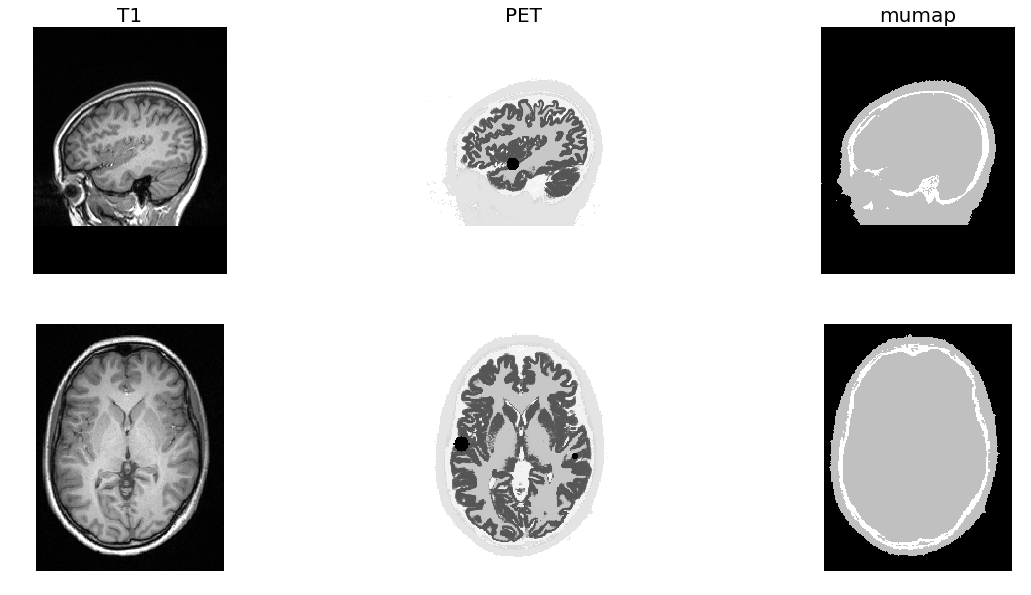

In [13]:
# display MR native resolution images

def crop(x,f=0.1):
    i =  int(np.ceil(x.shape[0]*f/2.0)*2)//2    
    return x[i:x.shape[0]-i, i:x.shape[1]-i]

i = 40
fig, ax = plt.subplots(2,3,figsize=(20,10))
ax[0,0].imshow(np.rot90(crop(t1_h)[:,i,:],1),cmap='gist_gray',vmax=500),ax[0,0].set_title('T1',fontsize=20), ax[0,0].axis('off')
ax[0,1].imshow(np.rot90(crop(pet_h)[:,i,:],1),cmap='gist_gray_r'),ax[0,1].set_title('PET',fontsize=20), ax[0,1].axis('off')
ax[0,2].imshow(np.rot90(crop(mumap_h)[:,i,:],1),cmap='gist_gray'),ax[0,2].set_title('mumap',fontsize=20), ax[0,2].axis('off')
i = 128
ax[1,0].imshow(crop(t1_h)[:,:,i],cmap='gist_gray',vmax=500), ax[1,0].axis('off')
ax[1,1].imshow(crop(pet_h)[:,:,i],cmap='gist_gray_r'), ax[1,1].axis('off')
ax[1,2].imshow(crop(mumap_h)[:,:,i],cmap='gist_gray'), ax[1,2].axis('off')